## DRAGON REAL ESTATE - PRICE PREDICTOR

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            411 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing['X2 house age'].value_counts()

X2 house age
0.0     17
13.6     7
13.3     6
13.2     6
16.2     6
        ..
26.8     1
7.6      1
1.9      1
18.5     1
18.8     1
Name: count, Length: 235, dtype: int64

In [6]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,411.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.770560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.403268,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.100000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.300000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
%matplotlib inline

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

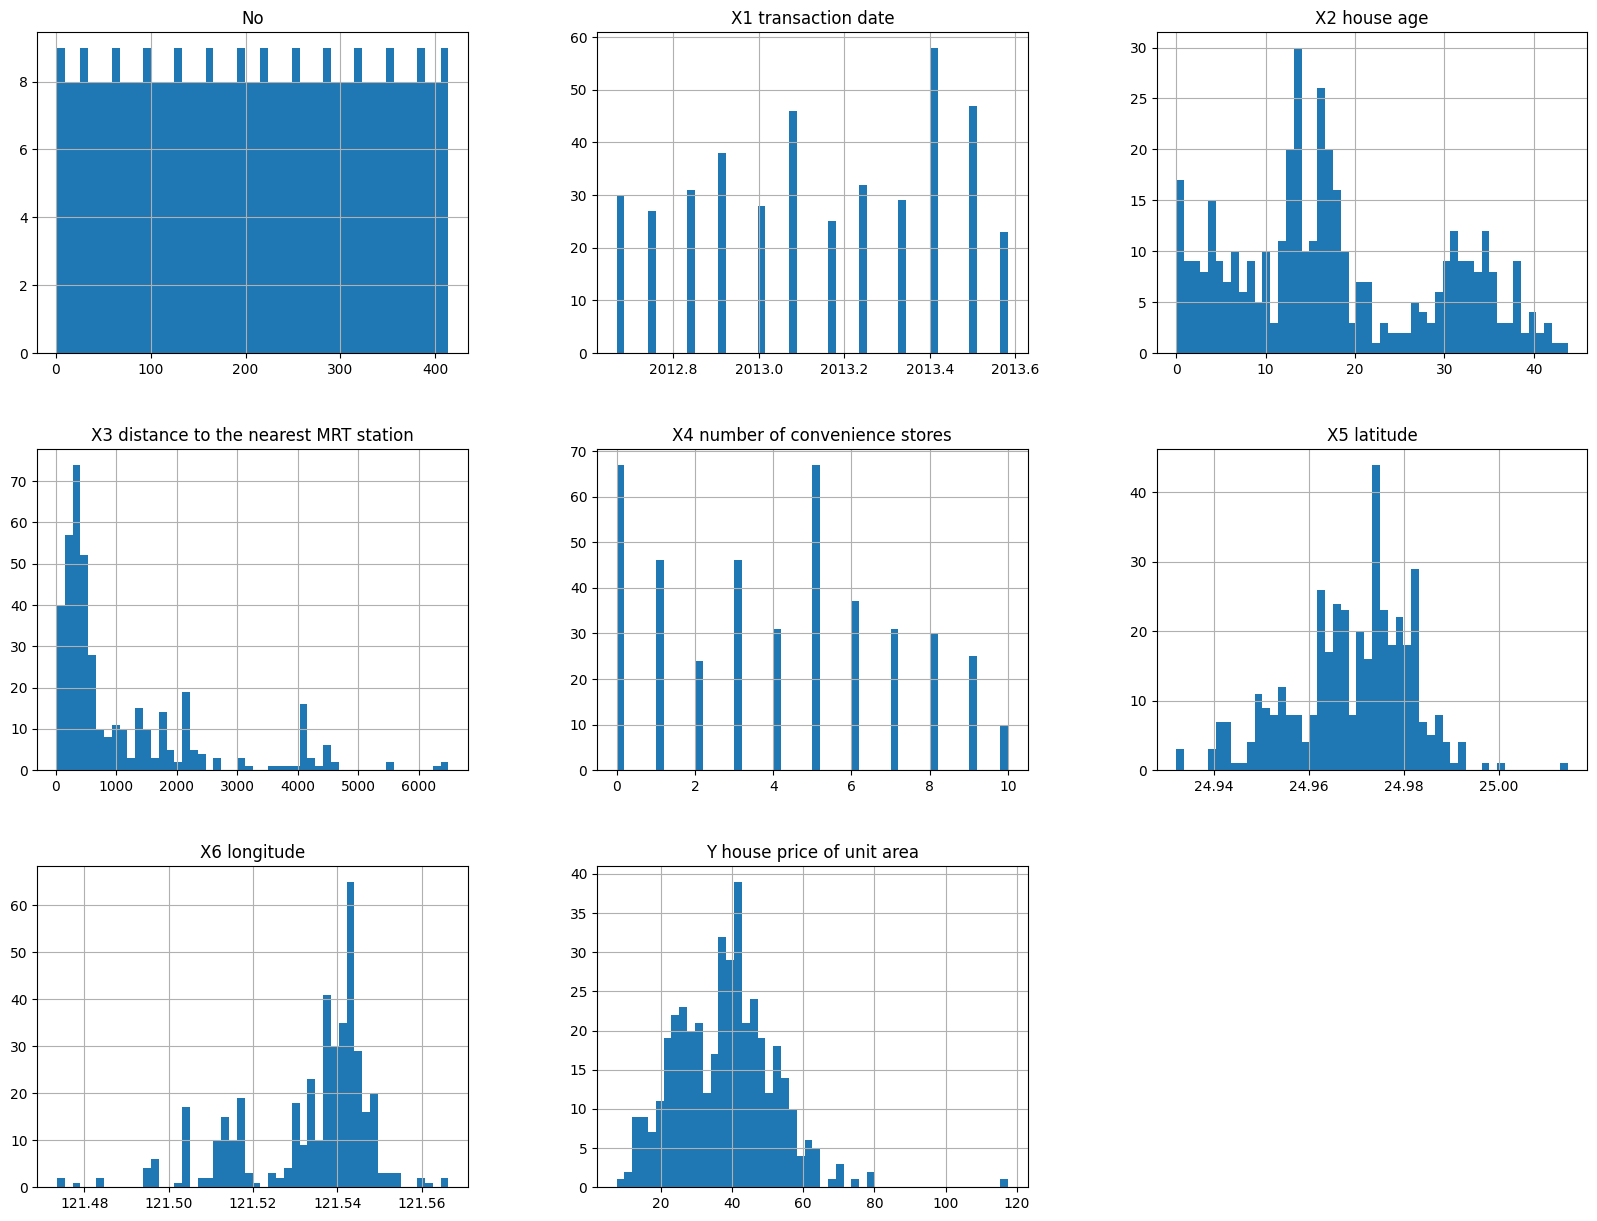

In [8]:
#for plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [9]:
#housing.hist(bins=50, figsize=(20,15))

## TRAIN-TEST SPLITTING

In [10]:
# for learning 
import numpy as np
def  split_train_test (data , test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set , test_set = split_train_test(housing, 0.2)

In [12]:
# print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing , test_size = 0.2 , random_state= 42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:331
Rows in test set:83



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['X1 transaction date']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['X1 transaction date'].value_counts()

X1 transaction date
2013.417    12
2013.083     9
2013.500     9
2012.917     8
2012.667     6
2012.833     6
2013.333     6
2013.000     6
2013.250     6
2012.750     5
2013.167     5
2013.583     5
Name: count, dtype: int64

In [16]:
strat_train_set['X1 transaction date'].value_counts()

X1 transaction date
2013.417    46
2013.500    38
2013.083    37
2012.917    30
2013.250    26
2012.833    25
2012.667    24
2013.333    23
2013.000    22
2012.750    22
2013.167    20
2013.583    18
Name: count, dtype: int64

In [17]:
# 12/9

In [18]:
# 46/38

In [19]:
housing = strat_train_set.copy()

## Looking for Correlations

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X5 latitude'>,
        <Axes: xlabel='X5 latitude', ylabel='X5 latitude'>,
        <Axes: xlabel='X1 transaction date', ylabel='X5 latitude'>,
        <Axes: xlabel='X2 house age', ylabel='X5 latitude'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X1 transaction date'>,
        <Axes: xlabel='X5 latitude', ylabel='X1 transaction date'>,
        <Axes: xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <Axes: xlabel='X2 house age', ylabel='X1 transaction date'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>,
        <Axes: xlabel='X5 latitude', 

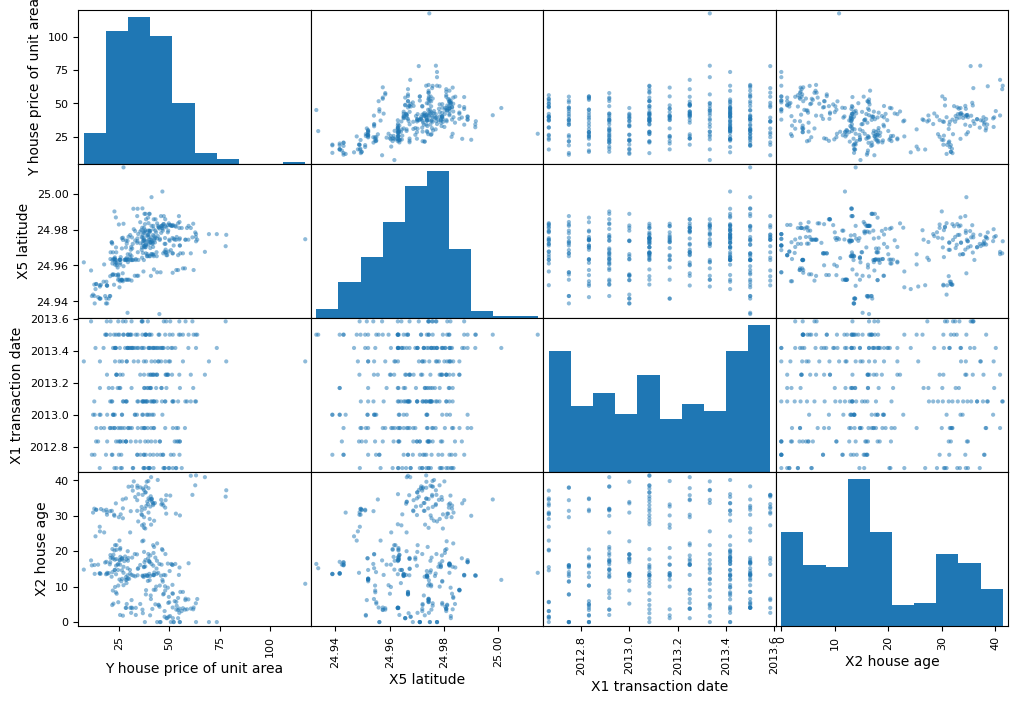

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["Y house price of unit area","X5 latitude","X1 transaction date","X2 house age"]
scatter_matrix(housing[attributes],figsize = (12,8))

<Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>

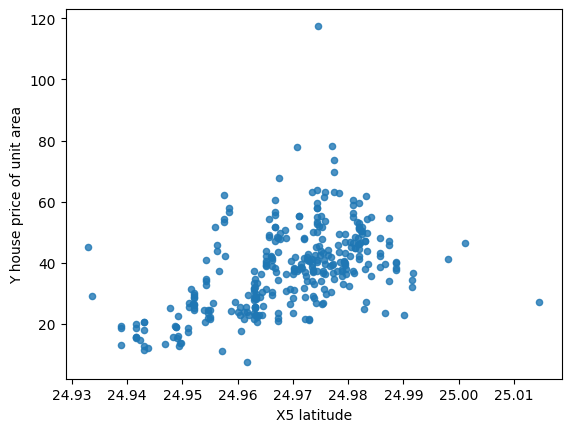

In [21]:
housing.plot(kind = "scatter" ,x = "X5 latitude", y = "Y house price of unit area", alpha = 0.8)

## Trying out Attribute combinations

In [22]:
housing["LPL"] = housing["X5 latitude"]/housing["X6 longitude"]

In [23]:
housing["LPL"]

24     0.205478
391    0.205272
278    0.205336
67     0.205419
411    0.205523
         ...   
337    0.205425
52     0.205519
71     0.205498
325    0.205440
225    0.205410
Name: LPL, Length: 331, dtype: float64

In [24]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,LPL
24,25,2013.000,39.6,480.6977,4,24.97353,121.53885,38.8,0.205478
391,392,2013.583,6.2,1939.7490,1,24.95155,121.55387,31.3,0.205272
278,279,2012.750,0.0,208.3905,6,24.95618,121.53844,44.0,0.205336
67,68,2013.500,8.5,104.8101,5,24.96674,121.54067,56.8,0.205419
411,412,2013.250,18.8,390.9696,7,24.97923,121.53986,40.6,0.205523


In [25]:
corr_matrix = housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.545551
X5 latitude                               0.521617
X6 longitude                              0.465676
LPL                                       0.431781
X1 transaction date                       0.093637
No                                        0.012800
X2 house age                             -0.168624
X3 distance to the nearest MRT station   -0.653192
Name: Y house price of unit area, dtype: float64

<Axes: xlabel='LPL', ylabel='Y house price of unit area'>

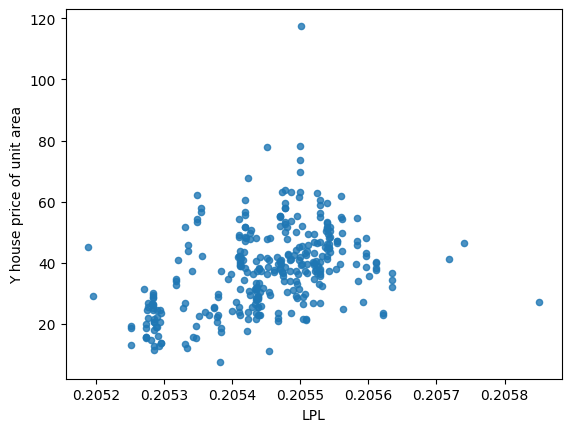

In [26]:
housing.plot(kind = "scatter" ,x = "LPL", y = "Y house price of unit area", alpha = 0.8)

In [27]:
housing = strat_train_set.drop("Y house price of unit area",axis = 1)
housing_labels = strat_train_set["Y house price of unit area"].copy()

## Missing Attributes

In [28]:
#To take care of missing attributes, you have three options:
#         1. Get rid of the missing data points.
        # 2. Get rid of the whole attribute.
       #  3. Set the attribute to some value(0,mean,median)

In [29]:
#Option 1
#a = housing.dropna(subset=["X2 house age"])
#a.shape

In [30]:
#Option 2
#housing.drop("X2 house age", axis=1).shape

In [31]:
median = housing["X2 house age"].median()

In [32]:
housing["X2 house age"].fillna(median)

24     39.6
391     6.2
278     0.0
67      8.5
411    18.8
       ... 
337    31.3
52     32.1
71     35.5
325    36.6
225     1.1
Name: X2 house age, Length: 331, dtype: float64

In [33]:
housing.shape #before we started filling midsing attributes.

(331, 7)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([ 205.     , 2013.167  ,   16.1    ,  535.527  ,    4.     ,
         24.9711 ,  121.53788])

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [38]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,207.773414,2013.148305,17.868278,1098.354193,3.921450,24.968961,121.533457
std,121.311495,0.282119,11.388380,1228.384528,2.960322,0.012553,0.015181
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932930,121.473530
25%,100.000000,2012.917000,9.100000,292.997800,1.000000,24.962990,121.527600
50%,205.000000,2013.167000,16.100000,535.527000,4.000000,24.971100,121.537880
75%,317.500000,2013.417000,29.200000,1455.798000,6.000000,24.977705,121.543480
max,414.000000,2013.583000,41.400000,6488.021000,10.000000,25.014590,121.566270


## Scikit-learn Design

Primarily, three types of objects:
1. Estimators - It estimates some parameter based on a dataset. Eg. imputerIt has a fit and transform method.Fit method - Fits the dataset and calculates internal parameters.
2. Transformers- transform method takes input and returns output basedx on learnings from fit().It also has a convenience function called            fit_transform() which fits and then transforms. 
3. Predictors - LinearRegression model is an example of a predictor. fit() and predict are two common functions.It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, there are two types of feature scaling methods:

1.Min-max scaling (Normalisation) = (value-min)/(max-min) ; sklearn provides a class called MinMaxScaler for this.

2.Standardization = (value-mean)/std ; sklearn provides a class called StandardScaler for this.

## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy = "median")), 
    #add as many you want in your pipeline.
    ('std_scaler' , StandardScaler()), 
    ])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(331, 7)

## Selecting a desired model for Dragon Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([39.752, 30.119, 45.562, 55.47 , 40.556])

In [47]:
list(some_labels)

[38.8, 31.3, 44.0, 56.8, 40.6]

## Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [49]:
rmse

np.float64(2.9720045312103327)

## Using better evaluation technique - Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [51]:
rmse_scores

array([14.38715512,  8.14079798,  7.43950774,  6.40112707,  3.99608833,
        5.46832679,  8.49297451,  9.80003526,  6.21617759,  6.14411739])

In [52]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [53]:
print_scores(rmse_scores)

Scores: [14.38715512  8.14079798  7.43950774  6.40112707  3.99608833  5.46832679
  8.49297451  9.80003526  6.21617759  6.14411739]
Mean: 7.648630778849781
Standard deviation: 2.7386432565160828


QUIZ - Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the Model

In [54]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model on Test Data

In [55]:
X_test = strat_test_set.drop("Y house price of unit area", axis=1)
Y_test = strat_test_set["Y house price of unit area"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print (final_predictions, list(Y_test))

In [56]:
final_rmse

np.float64(6.339846622180309)

In [57]:
prepared_data

array([[-1.50892654, -0.52647856,  1.91112552, -0.50358142,  0.02657439,
         0.36450366,  0.3557868 ],
       [ 1.52092352,  1.54315307, -1.0261287 ,  0.68599747, -0.98836307,
        -1.38907548,  1.34665405],
       [ 0.58802691, -1.41397069, -1.57136751, -0.72559617,  0.70319937,
        -1.01969097,  0.32873916],
       [-1.15393048,  1.24850569, -0.82386269, -0.81004629,  0.36488688,
        -0.17720709,  0.47585194],
       [ 1.68603797,  0.36101356,  0.08193726, -0.57673763,  1.04151186,
         0.81925349,  0.42241635]])

## Using the Model

In [58]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')

In [59]:
features = np.array([[-1.50892654, -0.52647856,  1.91112552, -0.50358142,  0.02657439,
         0.36450366,  0.3557868 ],
       [ 1.52092352,  1.54315307, -1.0261287 ,  0.68599747, -0.98836307,
        -1.38907548,  1.34665405],
       [ 0.58802691, -1.41397069, -1.57136751, -0.72559617,  0.70319937,
        -1.01969097,  0.32873916],
       [-1.15393048,  1.24850569, -0.82386269, -0.81004629,  0.36488688,
        -0.17720709,  0.47585194],
       [ 1.68603797,  0.36101356,  0.08193726, -0.57673763,  1.04151186,
         0.81925349,  0.42241635]])

model.predict(features)

array([39.752, 30.119, 45.562, 55.47 , 40.556])